In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
count = 0 
dirs = os.listdir('Fruits_images/')
for dir in dirs:
    files = list(os.listdir('Fruits_images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Fruits_images')
    count = count + len(files)
print( 'Fruits_images Folder has '+ str(count) + ' Fruits_images')

Apple Folder has 1940 Fruits_images
Banana Folder has 1940 Fruits_images
Grape Folder has 1940 Fruits_images
Mango Folder has 1940 Fruits_images
Fruits_images Folder has 7760 Fruits_images


In [3]:
base_dir = 'Fruits_images/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,subset='training',batch_size=batch,image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,subset='validation',batch_size=batch,image_size=(img_size,img_size))

Found 7760 files belonging to 4 classes.
Using 6208 files for training.
Found 7760 files belonging to 4 classes.
Using 1552 files for validation.


In [5]:
fruits_names = train_ds.class_names
fruits_names

['Apple', 'Banana', 'Grape', 'Mango']

In [6]:
import matplotlib.pyplot as plt

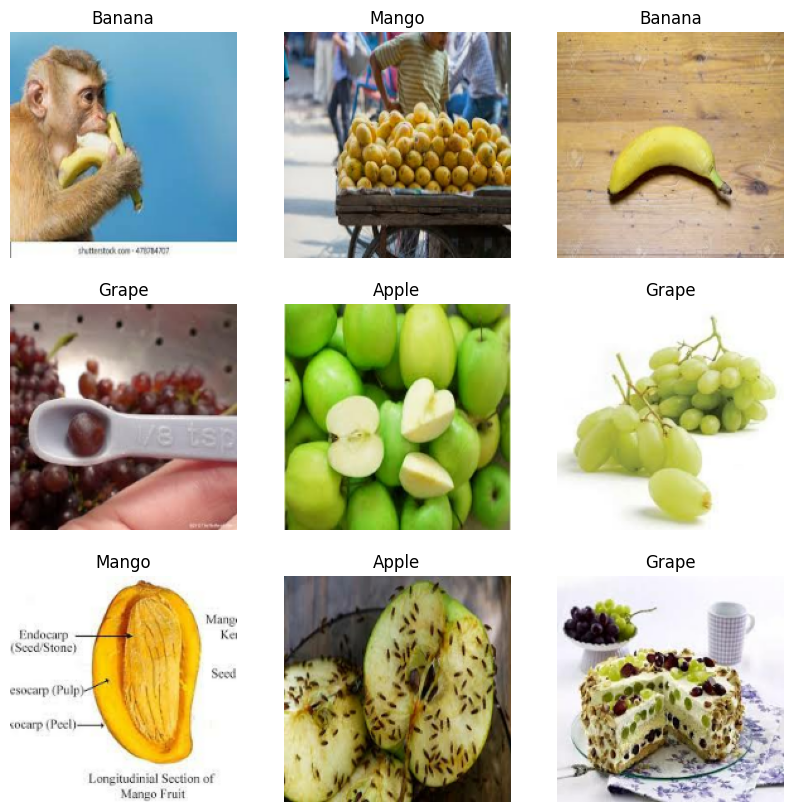

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(fruits_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [11]:
data_augmentation = Sequential([layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),layers.RandomRotation(0.1), layers.RandomZoom(0.1)])

C:\Users\Ankita\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


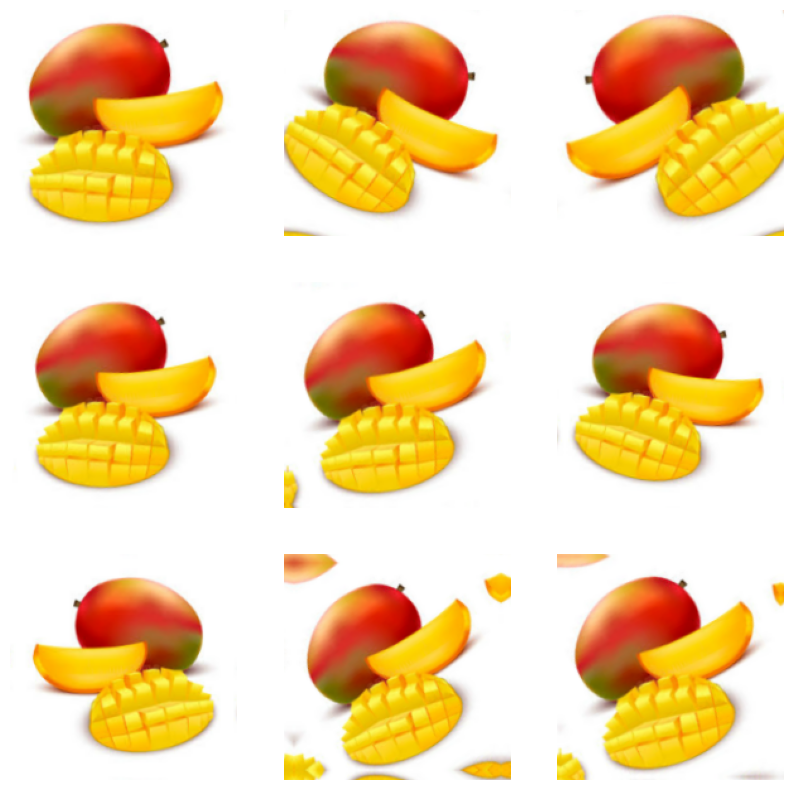

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(10,10))

for Fruits_images, labels in train_ds.take(1):
    for i in range(9):
        # Add batch dimension
        augmented_img = data_augmentation(tf.expand_dims(Fruits_images[0], 0))
        plt.subplot(3,3, i+1)
        plt.imshow(augmented_img[0].numpy().astype("uint8"))  # remove batch after augmentation
        plt.axis("off")

plt.show()


In [17]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(12)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,188 (15.22 MB)

 Trainable params: 3,990,188 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 34s 159ms/step - accuracy: 0.3846 - loss: 1.3548 - val_accuracy: 0.5503 - val_loss: 1.0902
Epoch 2/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 31s 158ms/step - accuracy: 0.5653 - loss: 1.0211 - val_accuracy: 0.6089 - val_loss: 0.9558
Epoch 3/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.5954 - loss: 0.9652 - val_accuracy: 0.6192 - val_loss: 0.9239
Epoch 4/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 27s 141ms/step - accuracy: 0.6181 - loss: 0.9236 - val_accuracy: 0.6250 - val_loss: 0.9159
Epoch 5/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.6506 - loss: 0.8764 - val_accuracy: 0.6360 - val_loss: 0.8652
Epoch 6/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.6534 - loss: 0.8369 - val_accuracy: 0.6347 - val_loss: 0.8929
Epoch 7/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 26s 132ms/step - accuracy: 0.6738 - loss: 0.8189 - val_accuracy: 0.6727 - val_loss: 0.8757
Epoch 8/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.6856 - loss: 0

In [21]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + fruits_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [22]:
from PIL import Image
img = Image.open(r"C:\Users\Ankita\Desktop\Fruit_Classifier_CNN\Fruits_images\Grape\Grape (1).jpeg")
img.show()

In [23]:
model.save_weights('Fruit_Recog_Model.weights.h5')
model.save('Fruit_Recog_Model.h5') 